Final Project
By: Emily Wichmann

In [93]:
library('tidyverse')
library('ggrepel')

In [4]:
office_ratings <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv')

Rows: 188 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): title
dbl  (4): season, episode, imdb_rating, total_votes
date (1): air_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
office_ratings |> head()

season,episode,title,imdb_rating,total_votes,air_date
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
1,1,Pilot,7.6,3706,2005-03-24
1,2,Diversity Day,8.3,3566,2005-03-29
1,3,Health Care,7.9,2983,2005-04-05
1,4,The Alliance,8.1,2886,2005-04-12
1,5,Basketball,8.4,3179,2005-04-19
1,6,Hot Girl,7.8,2852,2005-04-26


In [50]:
class(office_ratings$imdb_rating)

[1] "numeric"

In [53]:
top20episodes <- office_ratings |>
    arrange(desc(imdb_rating)) |>
    head(20)

In [43]:
top20episodes |> head()

season,episode,title,imdb_rating,total_votes,air_date
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
7,21,"Goodbye, Michael",9.7,5749,2011-04-28
9,23,Finale,9.7,7934,2013-05-16
5,13,Stress Relief,9.6,5948,2009-02-01
2,22,Casino Night,9.3,3644,2006-05-11
3,23,The Job,9.3,3010,2007-05-17
4,9,Dinner Party,9.3,4095,2008-04-10


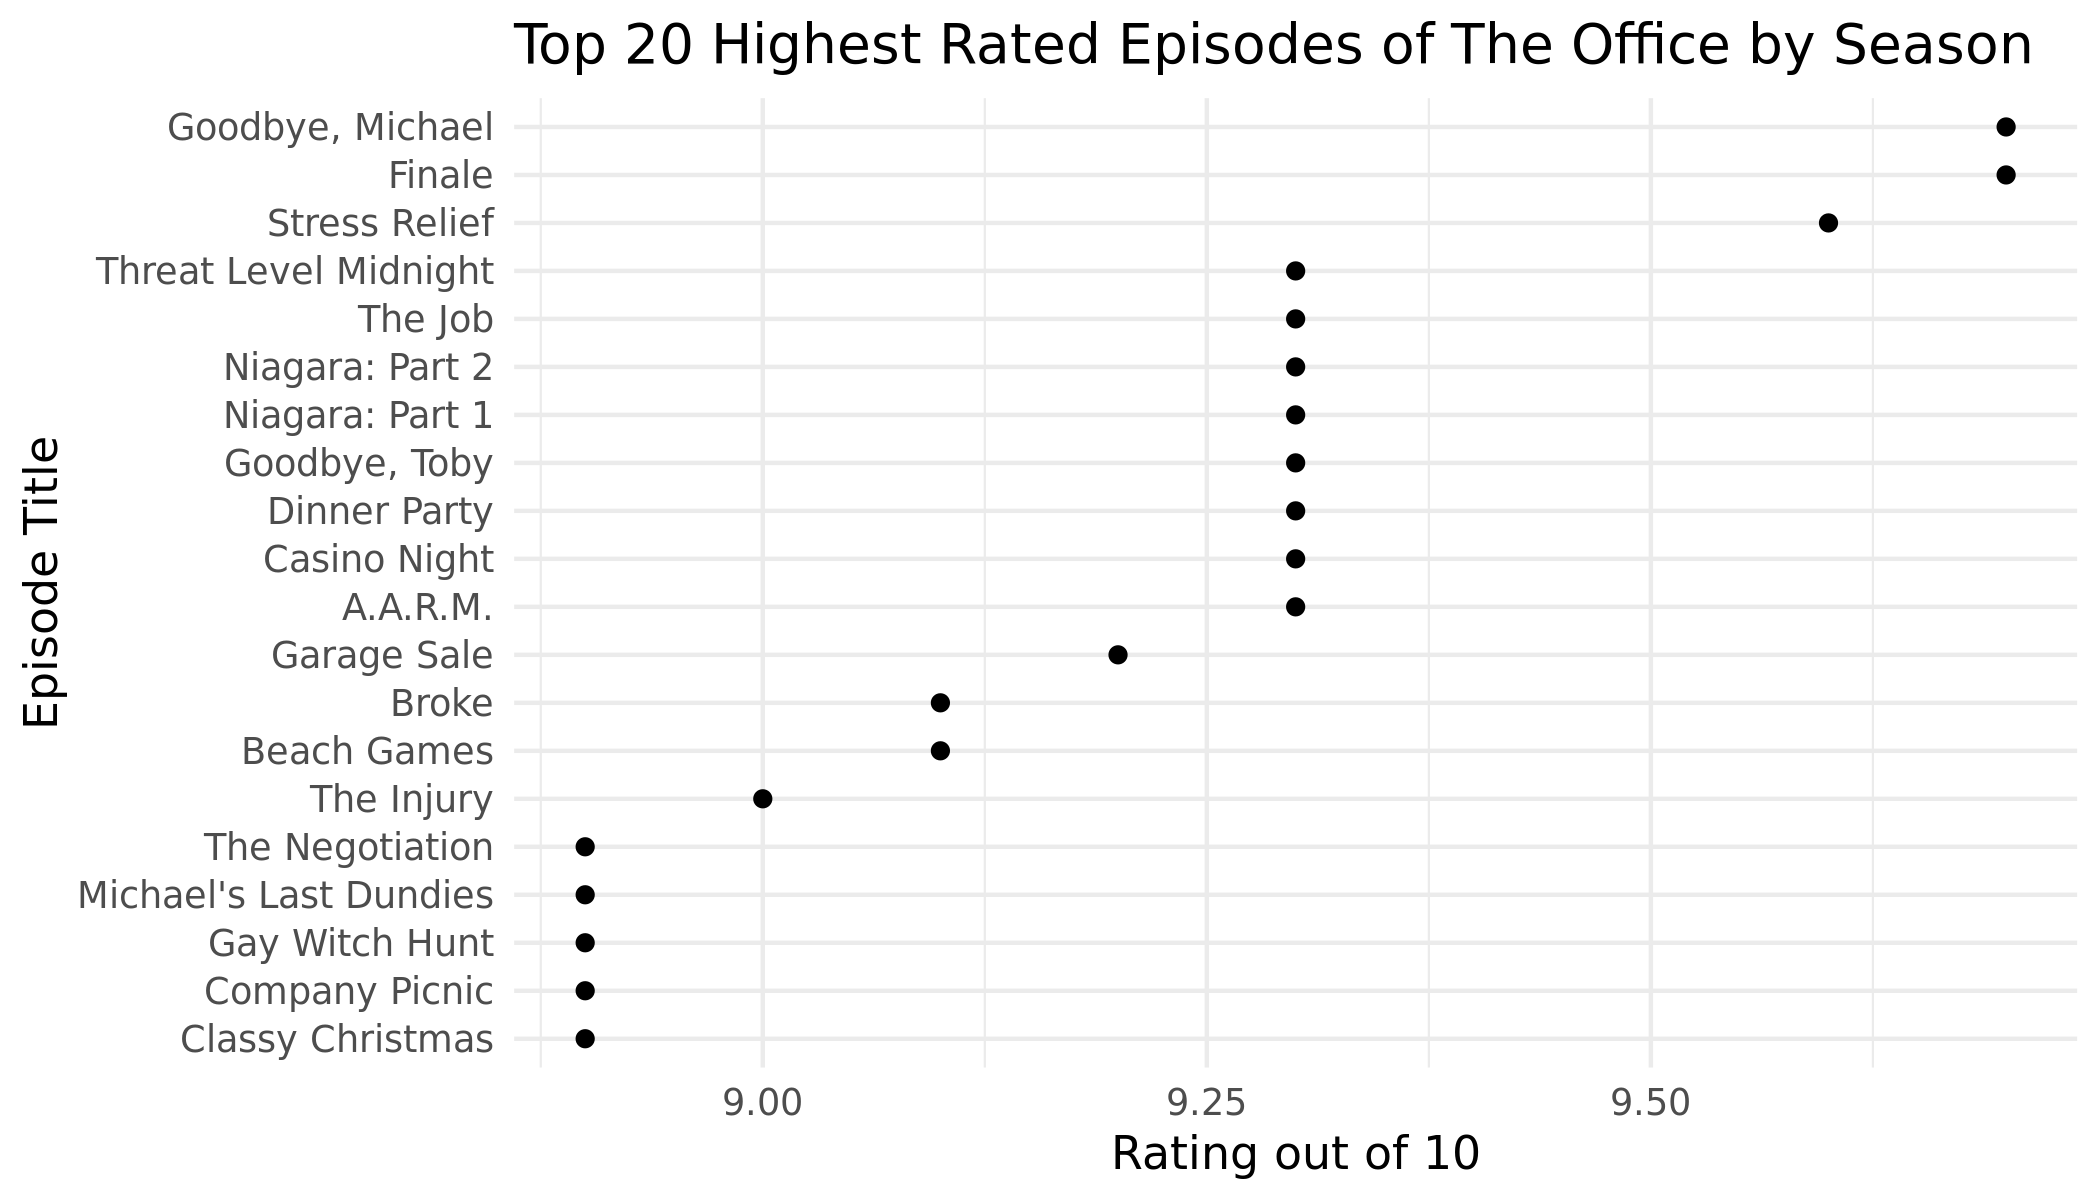

In [54]:
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)
p = ggplot(top20episodes, aes(x = fct_reorder(title, imdb_rating), y = imdb_rating)) +
  geom_point() +
  coord_flip()+
  labs(title = "Top 20 Highest Rated Episodes of The Office by Season",
       x = "Episode Title",
       y = "Rating out of 10") +
  theme_minimal() 
p


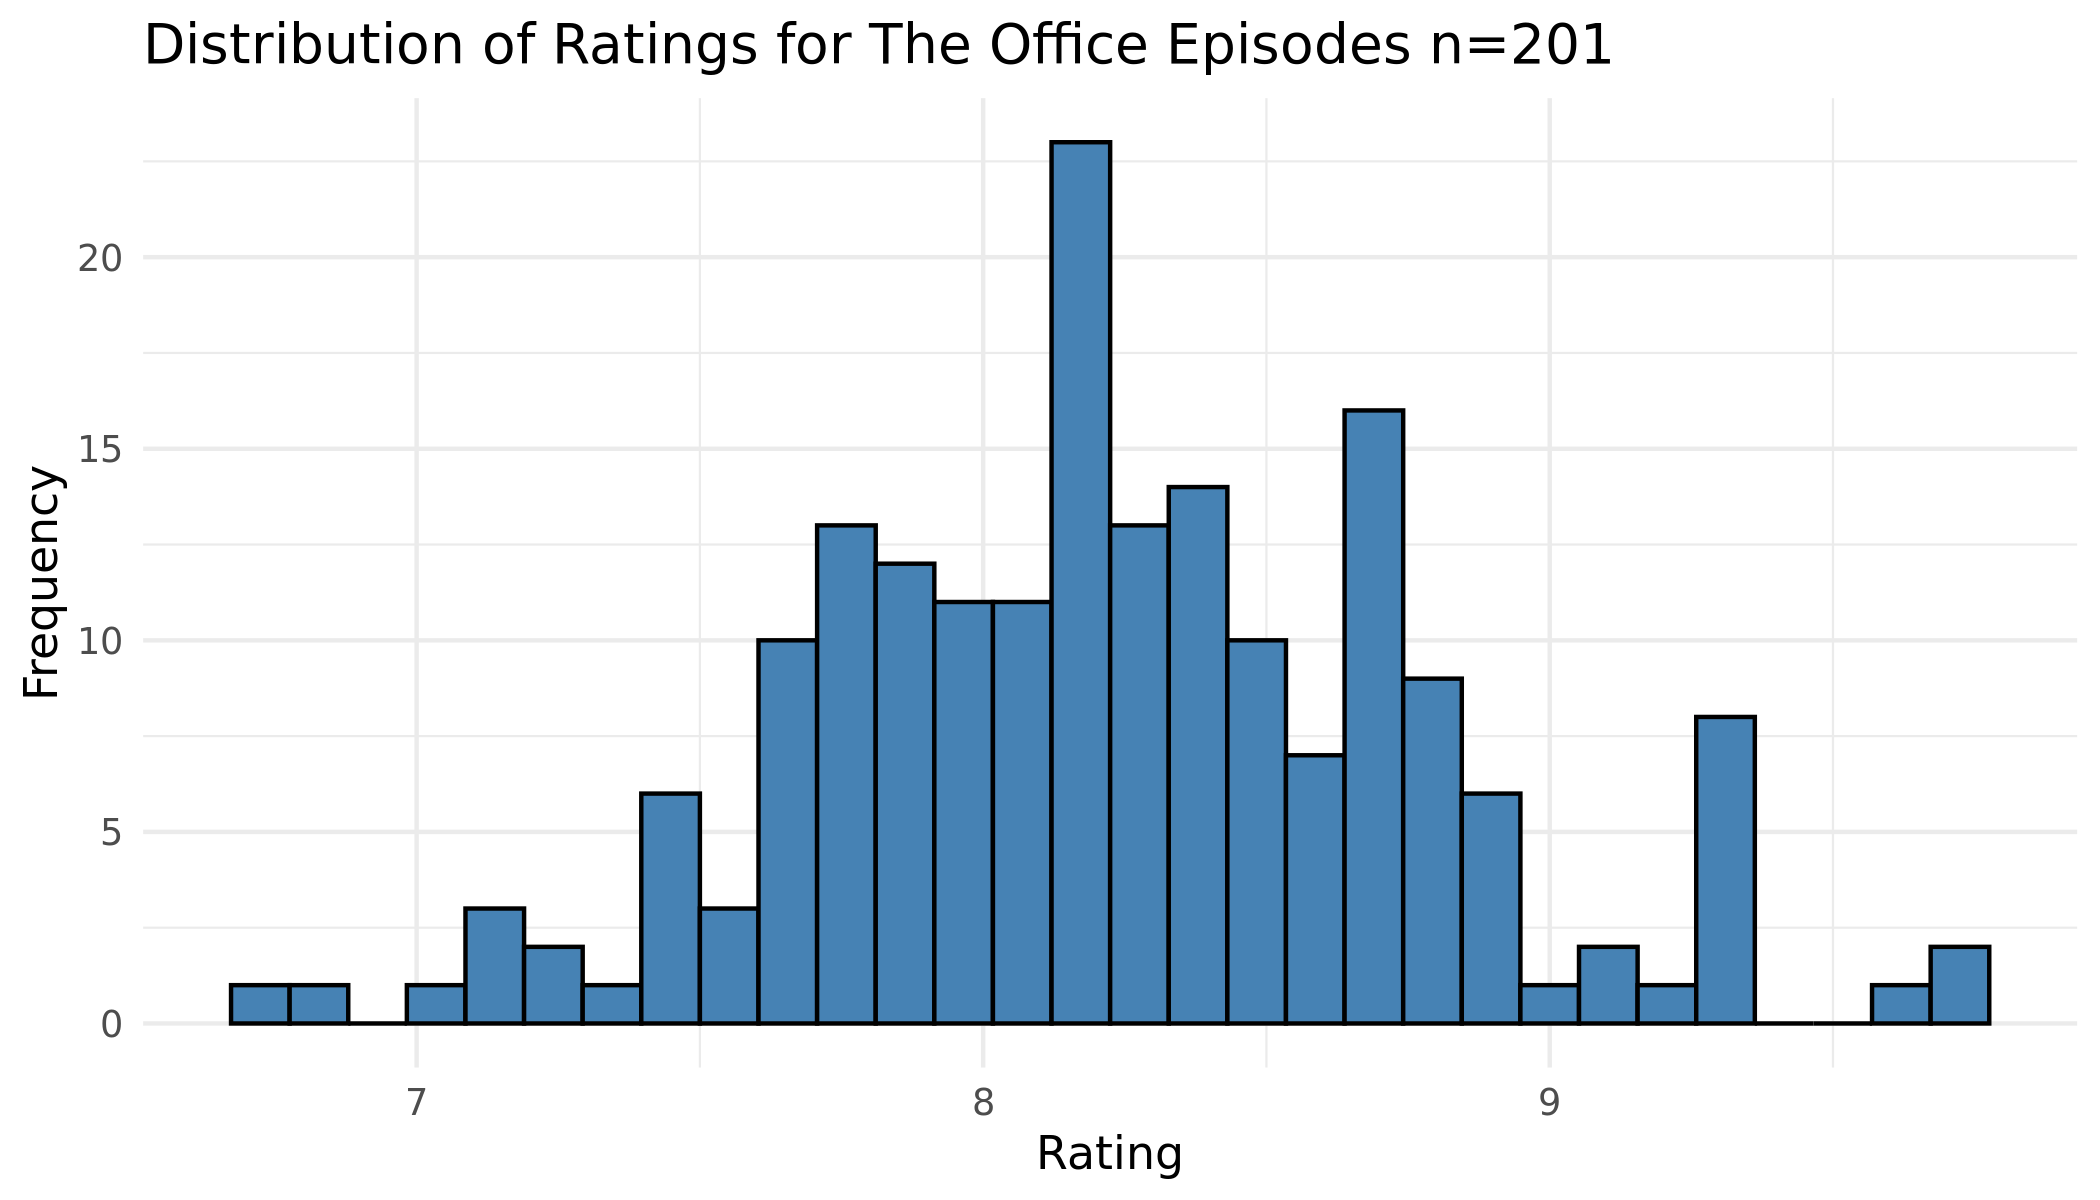

In [60]:
p= ggplot(office_ratings, aes(x = imdb_rating)) +
  geom_histogram(fill = "steelblue", color = "black", bins = 30) +
  labs(title = "Distribution of Ratings for The Office Episodes n=201",
       x = "Rating",
       y = "Frequency") +
     theme_minimal()
p

In [89]:
votes_per_episode <- office_ratings |>
  group_by(title) |>
  summarise(totalvotes = sum(total_votes, na.rm = TRUE),imdb_rating = mean(imdb_rating, na.rm = TRUE))

In [126]:
highest_imdb_row <- votes_per_episode[which.max(votes_per_episode$imdb_rating), ]
highest_imdb <- highest_imdb_row$imdb_rating
highest_imdb_votes <- highest_imdb_row$totalvotes

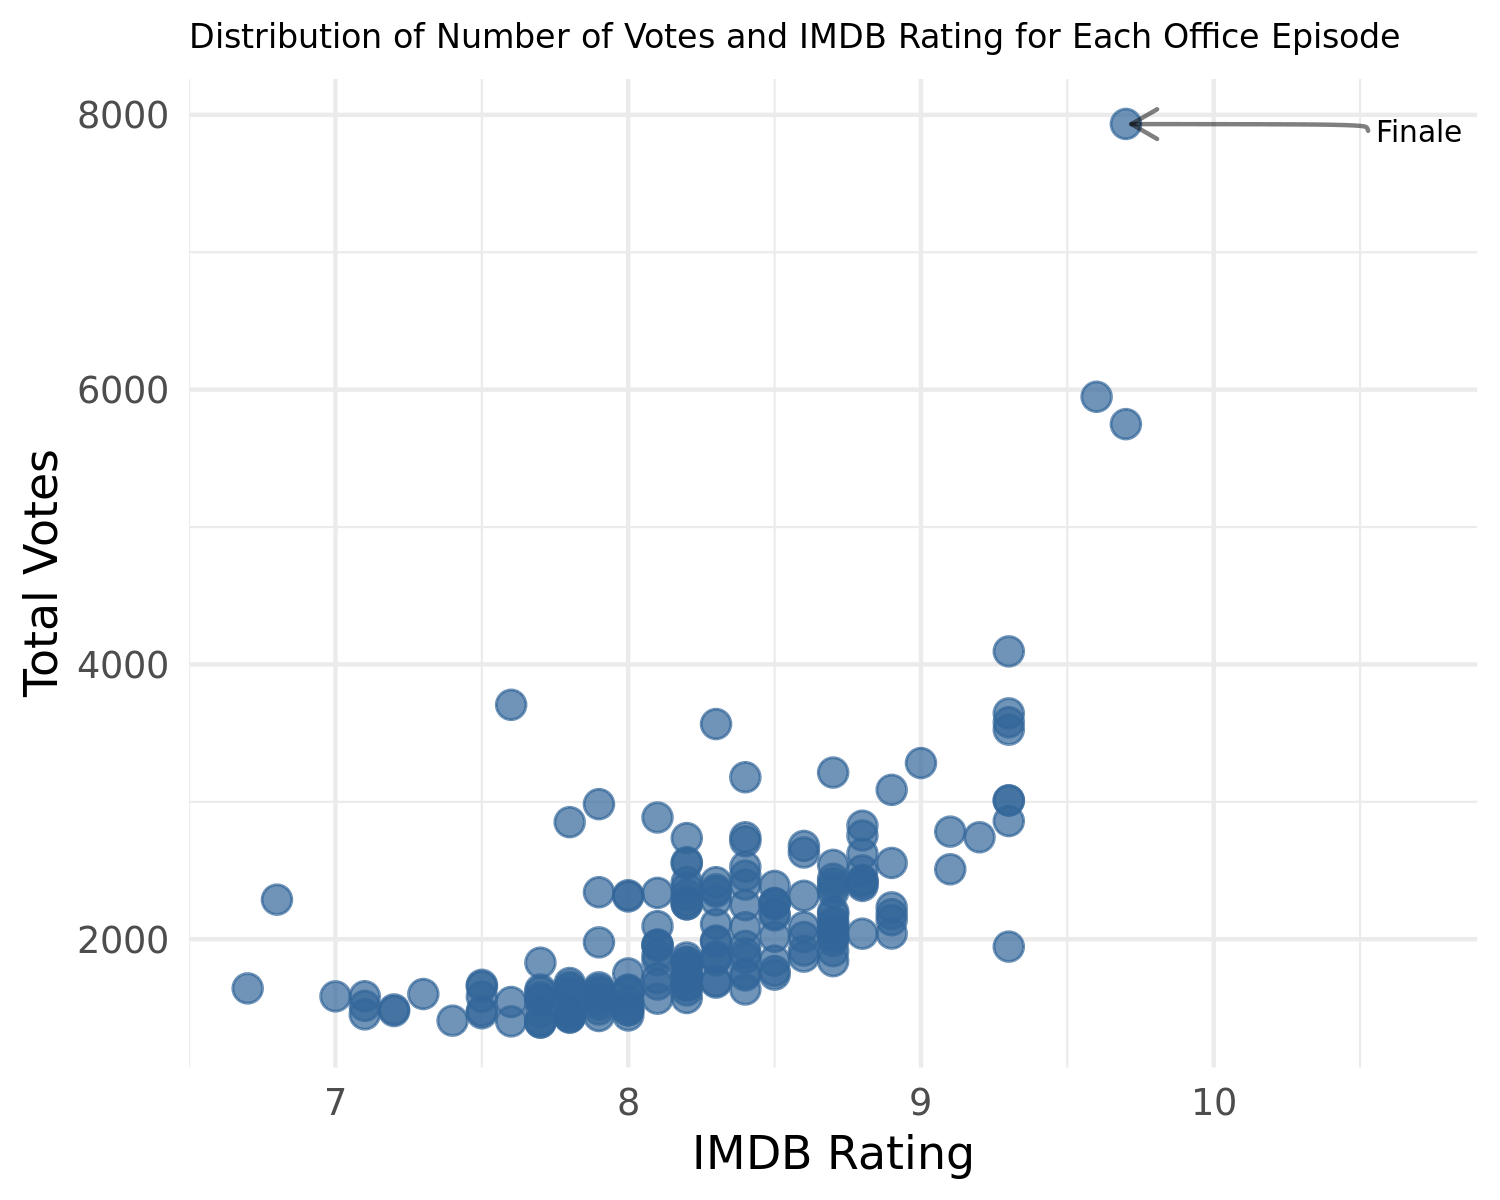

In [127]:
options(repr.plot.res = 300, repr.plot.width = 5, repr.plot.height = 4)
p3 = ggplot(votes_per_episode, aes(x =imdb_rating , y =totalvotes, )) +
  geom_point(size = 3,         
    shape = 19, color = "#336699", fill = "#336699",  alpha = 0.7 ) + 
  geom_text_repel( data = highest_imdb_row, aes(x = imdb_rating, y = totalvotes, label = title),                                             
    size = 2.5,
    nudge_y = -50,
    nudge_x = 1,
    segment.curvature = .5,
    segment.angle = 45,
    segment.alpha = 0.5,
    arrow = arrow(length = unit(0.03, "npc"))) +
  labs(title = "Distribution of Number of Votes and IMDB Rating for Each Office Episode",
       x = "IMDB Rating",
       y = "Total Votes") +
    theme_minimal()  +
     theme(plot.title = element_text(size = 8))

p3

In order to analyzed the imported data set of the TV show "The Office" ratings data, I needed to use tidyverse and ggrepel packages to transform data and improve visualizations. I looked at the data and decided to evaluate the 20 highest rated epidsodes of the show. I used dplyr to arrange the episodes in descending order and only look at the top 20 episodes. I then used ggplot to plot a scatter plot of the episodes in order of imdb_rating using a minimalist theme and retitling the axes for ease of reading. This led me to wonder how many times an IMDB score appeared and was distributed among the entire series. I graphed as a historgram to compare height of frequency and noticed that middle range imdb scores were the most reported. This observation makes sense because viewers probably only gave more extreme reviews for series finales so used ggplot to plot imdb rating to see the frequency. Lastly, I wanted to see how many votes contributed to each rating in curiosity if there would be any potential association of better voted episodes having more votes. I plotted votes by IMDB rating and thought scatter plot would best display this distribution. I wanted to show some transparency of the dots to make sure that point density was easily viewed. I utilized the ggrepel package to create an annotation on the graph since one episode seemed to have the highest IMDB score and the highest amount of votes. I used the command geom_text_repel to create a segment that pointed at the dot and was labeled the episode name and then clearly titled the axes. This plot shows that the finale had the most votes and highest imdb ranking which coordinates with my first visualization. Therefore, I recommend that readers of these graphs watch the finale!